In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import gc 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/mybetelnut/ola.npy
/kaggle/input/mybetelnut/odata.npy


In [2]:
total_X = np.load('/kaggle/input/mybetelnut/odata.npy') # data set already converted into numpy array
total_Y = np.load('/kaggle/input/mybetelnut/ola.npy') # label
total_X.shape
#X_1 = total_X[0:200]/

(1602, 800, 800, 3)

In [3]:
total_X = total_X.astype(np.float16)
total_Y = total_Y.astype(np.int16)

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [5]:
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(total_X,total_Y,test_size = 0.25) #spliting into train and test dataset
# remove unuseful data
del total_X
del total_Y
gc.collect()




10

In [ ]:
X_train = X_train.astype(np.float16) 
X_test = X_test.astype(np.float16)
Y_train = Y_train.astype(np.int16)
Y_test = Y_test.astype(np.int16)

In [6]:
# converting into onehot encoding
Y_train = np_utils.to_categorical(Y_train,5)
Y_test = np_utils.to_categorical(Y_test,5)

In [9]:
Model = tf.keras.models.Sequential([
                    tf.keras.layers.Conv2D(filters=8,kernel_size = (3,3),activation='relu',input_shape = (800,800,3)),
                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                    #tf.keras.layers.BatchNormalization(),
                    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation ='relu'),
                    tf.keras.layers.MaxPool2D(pool_size =(2,2)),
                    
                    #tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(32,activation='relu'),
                    #tf.keras.layers.Dropout(0.2),
                    tf.keras.layers.Dense(16,activation='relu'),
                    tf.keras.layers.Dense(5,activation='softmax')
])
Model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
#esizing the data so that it remains in the range of [0,1]
X_train = X_train/255.
X_test = X_test/255.
X_train = X_train.astype(np.float16)
X_test = X_test.astype(np.float16)

In [27]:
hist = Model.fit(X_train,Y_train,batch_size=16,epochs=20)

Train on 1201 samples
Epoch 1/20
1201/1201 [==============================] - 7s 6ms/sample - loss: 0.0014 - accuracy: 1.0000
Epoch 2/20
1201/1201 [==============================] - 7s 6ms/sample - loss: 0.0013 - accuracy: 1.0000
Epoch 3/20
1201/1201 [==============================] - 7s 6ms/sample - loss: 0.0012 - accuracy: 1.0000
Epoch 4/20
1201/1201 [==============================] - 7s 6ms/sample - loss: 0.0010 - accuracy: 1.0000
Epoch 5/20
1201/1201 [==============================] - 7s 6ms/sample - loss: 0.0011 - accuracy: 1.0000
Epoch 6/20
1201/1201 [==============================] - 7s 6ms/sample - loss: 0.0010 - accuracy: 1.0000
Epoch 7/20
1201/1201 [==============================] - 7s 6ms/sample - loss: 8.1872e-04 - accuracy: 1.0000
Epoch 8/20
1201/1201 [==============================] - 7s 6ms/sample - loss: 9.5254e-04 - accuracy: 1.0000
Epoch 9/20
1201/1201 [==============================] - 7s 6ms/sample - loss: 7.9555e-04 - accuracy: 1.0000
Epoch 10/20
1201/1201 [=======

In [28]:
import matplotlib.pyplot as plt
print(hist.history.keys())

dict_keys(['loss', 'accuracy'])


L1 norm for layer 1
 [('filt_6', 2.5962627), ('filt_1', 2.7447782), ('filt_3', 3.2208903), ('filt_5', 3.4326737), ('filt_0', 3.4814777), ('filt_4', 3.4897108), ('filt_2', 3.7612576), ('filt_7', 4.0489554)]
L1 norm for layer 2
 [('filt_11', 4.175316), ('filt_4', 4.2506056), ('filt_15', 4.3234053), ('filt_5', 4.3600097), ('filt_9', 4.4831314), ('filt_29', 4.486637), ('filt_8', 4.4917574), ('filt_14', 4.518301), ('filt_19', 4.5999427), ('filt_26', 4.7761936), ('filt_18', 4.803508), ('filt_10', 4.8112965), ('filt_24', 4.8293786), ('filt_2', 4.851617), ('filt_30', 4.9131556), ('filt_12', 4.9159765), ('filt_31', 4.9389663), ('filt_27', 5.085125), ('filt_21', 5.087566), ('filt_28', 5.1562786), ('filt_22', 5.1923933), ('filt_20', 5.272672), ('filt_13', 5.3045197), ('filt_7', 5.3207803), ('filt_25', 6.226098), ('filt_17', 6.5724545), ('filt_23', 6.861274), ('filt_0', 7.046027), ('filt_6', 7.2479877), ('filt_1', 7.5250387), ('filt_3', 7.8083515), ('filt_16', 8.266625)]


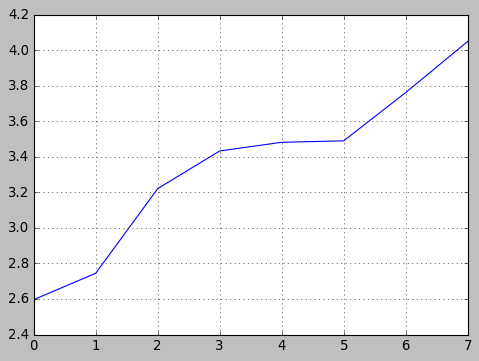

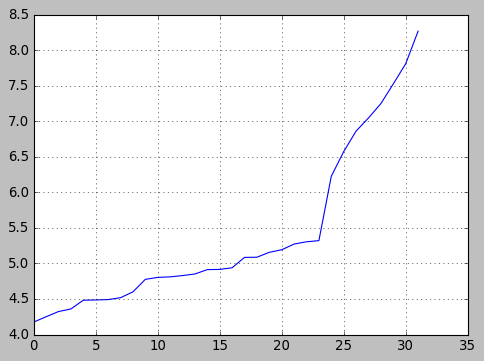

In [22]:
#plottimg L1 norm of filter weight matrix
w1 = Model.layers[0].get_weights()[0]
w2 = Model.layers[2].get_weights()[0]
conv = [w1,w2]
for i in range(len(conv)):
    weight = conv[i]
    weight_dict ={}
    num_filters = len(weight[0,0,0,:])
    for j in range(num_filters):
        w_s = np.sum(abs(weight[:,:,:,j]))
        filt = 'filt_{}'.format(j)
        weight_dict[filt] = w_s
    weight_dict_sort = sorted(weight_dict.items(),key=lambda x: x[1])
    print("L1 norm for layer {}\n".format(i+1),weight_dict_sort)
    weights_value = []
    for el in weight_dict_sort:
        weights_value.append(el[1])
    xr = range(num_filters)
    plt.figure(i+1,figsize=(7,5))
    plt.plot(xr,weights_value)
    plt.grid(True)
    plt.style.use(['classic'])

In [30]:
 pred2 = Model.predict(X_test)

In [26]:
# printing confusion matrix to check mislabeled datasets
from sklearn.metrics import confusion_matrix
actual = np.argmax(Y_test,axis = 1)
predicted = np.argmax(pred2,axis = 1)
print(confusion_matrix(actual,predicted))
print(actual,predicted)


[[60 49  0  0]
 [ 5 93  3  0]
 [ 0  2 49 49]
 [ 0  1 13 77]]
[4 3 1 1 3 2 1 2 4 3 4 2 2 2 1 1 3 3 3 1 3 2 1 2 1 2 4 4 4 1 2 2 1 4 1 2 3
 1 3 4 2 2 2 3 4 2 3 1 4 3 3 4 2 4 3 3 3 3 4 1 2 4 3 2 2 2 1 2 1 3 2 1 2 1
 3 3 4 3 3 1 4 4 2 2 4 3 2 4 1 4 3 2 1 3 2 3 3 3 2 2 3 1 1 1 1 3 2 3 4 1 2
 4 1 1 1 3 4 2 4 1 1 3 1 3 3 4 4 2 1 1 4 3 2 2 2 4 1 1 4 4 4 4 1 2 3 4 4 2
 2 4 3 3 2 1 1 3 4 3 3 1 1 1 4 1 1 4 4 1 1 1 4 2 2 1 2 3 3 1 2 1 3 1 3 3 1
 1 1 4 2 3 1 4 3 4 2 4 1 4 4 1 1 3 2 1 4 3 1 2 2 2 2 1 3 2 1 1 1 1 4 2 3 2
 3 2 3 1 4 2 4 3 3 3 4 1 1 2 4 1 2 3 3 2 3 4 3 3 2 3 1 4 4 1 3 3 1 4 1 1 4
 1 1 2 3 1 4 1 2 2 3 3 1 1 1 2 2 3 1 1 3 1 3 2 1 1 1 3 3 2 3 1 1 4 4 4 2 2
 4 1 3 4 3 1 3 2 4 3 3 3 4 4 2 1 3 1 3 1 3 3 4 3 4 2 4 2 4 1 4 1 2 4 4 3 2
 4 1 4 4 2 1 3 2 4 2 4 2 2 2 4 1 4 2 4 3 4 2 2 2 2 2 3 4 1 4 1 2 2 3 4 2 3
 2 2 2 4 2 1 4 2 3 4 2 4 3 1 1 1 4 3 2 4 3 3 1 3 3 1 2 2 1 1 2] [4 3 2 1 4 2 2 1 4 3 4 2 2 2 1 1 4 3 2 2 3 2 2 2 1 1 3 4 4 1 2 2 1 4 1 2 3
 2 3 4 2 2 2 4 4 2 4 1 4 3 3 4 2 4 4 3 4 3 4 2 2 3

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


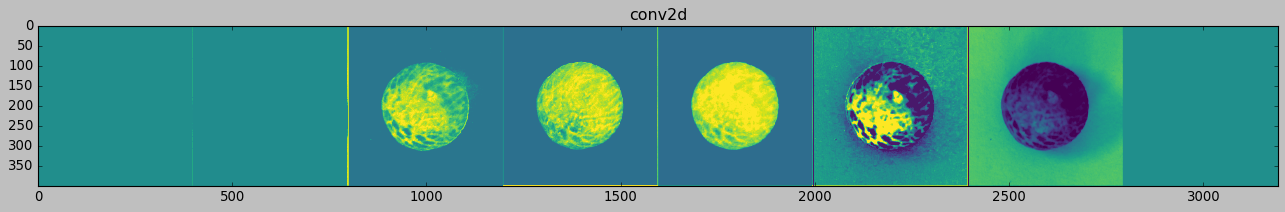

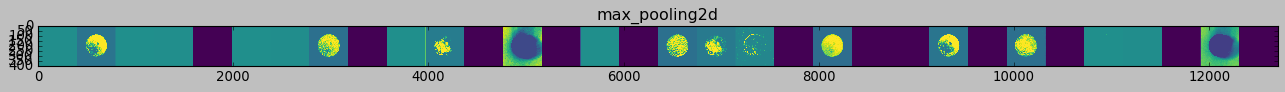

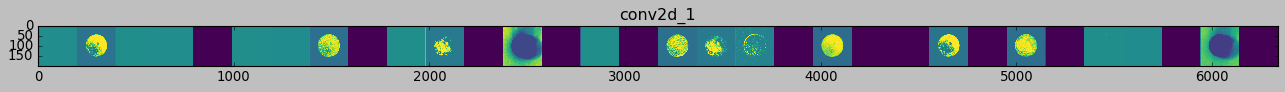

In [24]:
# to visualize the intermediate representation of the layers
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in Model.layers[1:]] 
visualization_model = tf.keras.models.Model(inputs = Model.input, outputs = successive_outputs)  
x = X_train[7,:,:,:] # training example on which visualization is to be performed
x = x.reshape((1,) + x.shape) 
successive_feature_maps = visualization_model.predict(x) 
layer_names = [layer.name for layer in Model.layers]
for layer_name,feature_map in zip(layer_names,successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size,size*n_features))
        for i in range(n_features):
            x = feature_map[0,:,:,i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x,0,255).astype('uint8')
            display_grid[:,i*size:(i+1)*size] = x
        scale = 20./n_features
        plt.figure(figsize = (scale*n_features,scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [25]:
Model.evaluate(X_test,Y_test)

401/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.8761798206187246, 0.7905237]